In [1]:
import xarray as xr
#from pathlib import Path
import matplotlib.pyplot as plt
#from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np
import pandas as pd
from dask.distributed import Client, LocalCluster, get_task_stream

#from itertools import product, combinations
#from cftime import DatetimeNoLeap
#from scipy.stats import ks_2samp, epps_singleton_2samp, ttest_ind, wilcoxon, mannwhitneyu
#from collections import ChainMap

In [2]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 22})

In [6]:
timescale = 20
DJF_bool = '_DJFonly'
root_path = '/mnt/nas4.meop2/meop40.data.model/CMAM/0A.daily/'
root_path = '/mnt/data04/model/CMAM/0A.daily/'
cesta = f'{root_path}composites_woSSW{DJF_bool}/'

In [4]:
cluster = LocalCluster(host='195.113.23.121')#, n_workers=4
client = Client(cluster) # 
client

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43601 instead
  warnings.warn(


Client Scheduler: tcp://195.113.23.121:34839 Dashboard: http://195.113.23.121:43601/status,Cluster Workers: 8 Cores: 64 Memory: 503.57 GiB


In [ ]:
sel_var = 'acceldiv'
infile = f'{root_path}{sel_var}/{sel_var}_6hrPlev_CMAM_CMAM30-SD_r1i1p1_19790101-20101231_anomalies.nc'
#ds = xr.open_dataset(infile)
infiles = f'{root_path}{sel_var}/{sel_var}_6hrPlev_CMAM_CMAM30-SD_r1i1p1_*18.nc'
ds = xr.open_mfdataset(infiles, concat_dim = 'time', 
                       parallel = True, combine='nested',
                       data_vars='minimal', coords='minimal', compat='override')

ds[sel_var] = ds[sel_var]*24*3600.
ds = ds.resample(time = '1D').mean('time')
ds['time'] = ds.indexes['time'].to_datetimeindex()
ds['plev'] = ds['plev']/100.
ds['plev'].attrs['units'] = 'hPa'
ds

In [75]:
sel_var = 'accelogw'
infile = f'{root_path}{sel_var}/accelogw_daily_CMAM_CMAM30-SD_r1i1p1_19790101-20101231_70hPa.nc'
ds_ogwd = xr.open_dataset(infile)
ds_ogwd[sel_var] = ds_ogwd[sel_var]*24*3600.
#ds_ogwd['time'] = ds_ogwd.indexes['time'].to_datetimeindex()
da_ogwd = ds_ogwd[sel_var]#.resample(time = '1D').mean('time')
#ds_ogwd['plev'] = ds_ogwd['plev']/100.
#ds_ogwd['plev'].attrs['units'] = 'hPa'
da_ogwd

<xarray.DataArray 'accelogw' (time: 11688, lat: 48, lon: 96)>
array([[[ 5.50924054e-02,  2.72732656e-02,  4.75903698e-02, ...,
          1.28111641e-02,  3.31479796e-02,  7.58279793e-02],
        [ 8.77923679e-02,  3.17331986e-01,  1.48881752e-01, ...,
          2.32723141e-01,  5.85047484e-01,  1.07670852e+00],
        [ 3.20457213e-02,  6.58320157e-02,  1.91615525e-02, ...,
          1.02848120e-01,  9.08261634e-02,  1.56609327e-01],
        ...,
        [-3.84679197e-03, -2.13504300e-02, -3.14545651e-01, ...,
          5.00943166e-09,  5.00943166e-09,  5.00943166e-09],
        [ 5.00943166e-09,  5.00943166e-09,  5.00943166e-09, ...,
          5.00943166e-09,  5.00943166e-09,  5.00943166e-09],
        [ 5.00943166e-09,  5.00943166e-09,  5.00943166e-09, ...,
          5.00943166e-09,  5.00943166e-09,  5.00943166e-09]],

       [[ 1.54665662e-01,  8.27342551e-02,  1.60349625e-01, ...,
          4.59972096e-02,  1.70383600e-01,  2.88898682e-01],
        [ 1.37013997e-02,  1.26887461e-03,  2.25700266e-03, ...,
          2.97524014e-02,  4.79588399e-02,  3.62364538e-02],
        [ 1.22641779e-03,  6.65147589e-03,  1.48623308e-02, ...,
         -4.55791118e-10, -4.55791118e-10, -4.55791118e-10],
...
        [-1.98202246e-10, -1.98202246e-10, -1.98202246e-10, ...,
         -9.28980593e-05, -1.98202246e-10, -1.98202246e-10],
        [-1.98202246e-10, -1.98202246e-10, -1.98202246e-10, ...,
         -1.98202246e-10, -1.98202246e-10, -1.98202246e-10],
        [-1.98202246e-10, -1.98202246e-10, -1.98202246e-10, ...,
         -1.98202246e-10, -1.98202246e-10, -1.98202246e-10]],

       [[-1.35390010e-09, -1.35390010e-09, -1.35390010e-09, ...,
          3.43096227e-03,  1.02954424e-03, -1.35390010e-09],
        [-9.37576142e-04, -4.39134632e-03, -6.36934928e-03, ...,
         -1.35390010e-09, -1.35390010e-09, -1.35390010e-09],
        [-5.57784384e-03, -1.52693722e-02, -1.35462576e-02, ...,
         -1.35390010e-09, -3.47278495e-03, -1.35390010e-09],
        ...,
        [ 5.19434837e-04,  2.88011506e-03,  4.52101627e-02, ...,
          4.63411292e-09,  4.63411292e-09,  4.63411292e-09],
        [ 4.63411292e-09,  4.63411292e-09,  4.63411292e-09, ...,
          4.63411292e-09,  4.63411292e-09,  4.63411292e-09],
        [ 4.63411292e-09,  4.63411292e-09,  4.63411292e-09, ...,
          4.63411292e-09,  4.63411292e-09,  4.63411292e-09]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2010-12-31
    plev     float64 ...
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2

In [69]:
mask = np.isin(da_ogwd.time.dt.month, [12,1,2])
arr1 = da_ogwd.sel(time = mask).mean(['lat','lon']).dropna('time')
mask = np.isin(ds.time.dt.month, [12,1,2])
arr2 = ds['acceldiv'].sel(time = mask, 
                          lat = slice(0,None), 
                          plev = slice(None,0.1))#.mean('lat')

In [62]:
arr1

<xarray.DataArray 'accelogw' (time: 2880)>
array([-0.59659557, -0.56903785, -0.75649466, ..., -1.09286869,
       -1.33494906, -1.20638088])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2010-12-31
    plev     float64 7e+03

In [63]:
arr2

<xarray.DataArray 'acceldiv' (time: 2880, plev: 48, lat: 24)>
dask.array<getitem, shape=(2880, 48, 24), dtype=float32, chunksize=(1, 48, 24), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2010-12-31
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 780.0 ... 0.3 0.2 0.15 0.1
  * lat      (lat) float64 1.856 5.567 9.278 12.99 ... 76.07 79.78 83.48 87.16

In [66]:
da_corr = xr.corr(arr1, arr2, 'time').compute()
da_corr

<xarray.DataArray (plev: 48, lat: 24)>
array([[-1.22654991e-01, -1.01401286e-01,  1.80785351e-01, ...,
         1.21707599e-01,  6.25225479e-02,  9.18558793e-03],
       [ 1.20749551e-01,  1.94884974e-01,  2.77846290e-01, ...,
         1.09708448e-01,  5.77172964e-02,  1.84483430e-03],
       [ 1.21665583e-01,  3.03944684e-01,  2.79924562e-01, ...,
         3.06404431e-02,  9.01435064e-03,  2.10621361e-02],
       ...,
       [ 1.05971165e-02,  1.51346663e-02,  5.34900811e-05, ...,
         9.55810771e-03,  1.37781590e-02,  3.66658903e-02],
       [ 1.79815215e-02,  9.62081640e-03,  1.07124874e-03, ...,
         4.48480135e-03,  1.41083809e-02,  4.43521762e-02],
       [ 1.86386583e-02,  9.68361151e-03, -3.61109916e-03, ...,
        -1.59777046e-02, -1.81054710e-04,  6.68581377e-02]])
Coordinates:
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 780.0 ... 0.3 0.2 0.15 0.1
  * lat      (lat) float64 1.856 5.567 9.278 12.99 ... 76.07 79.78 83.48 87.16

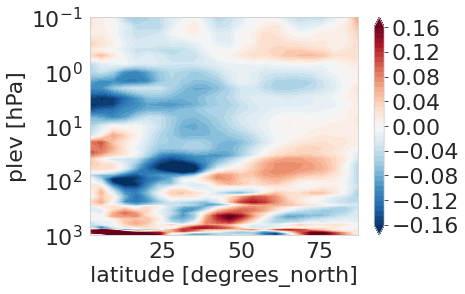

In [67]:
da_corr.plot.contourf(x = 'lat', robust = True, levels = 41, yincrease = False)
plt.yscale('log')

<AxesSubplot:xlabel='accelogw', ylabel='acceldiv'>

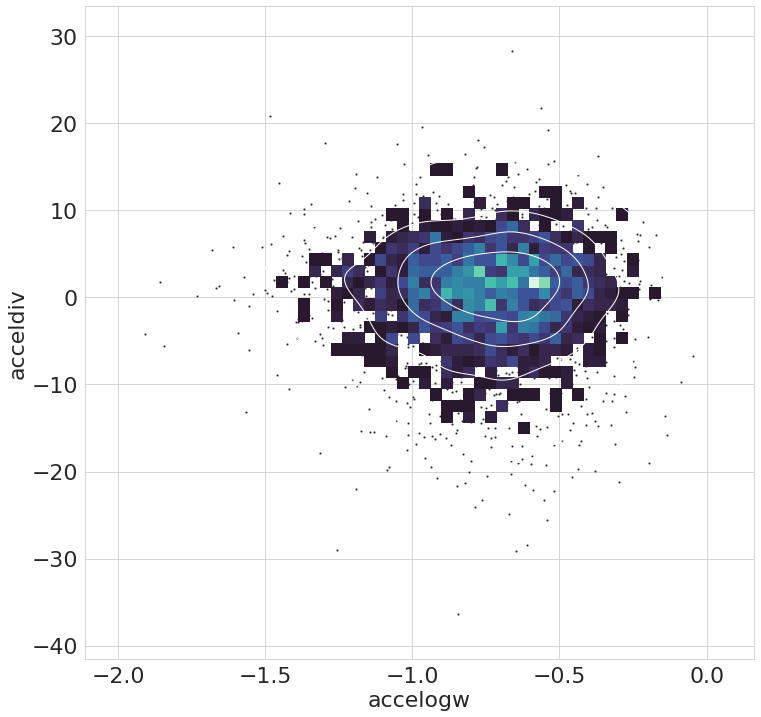

In [42]:
f, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(x=arr1, y=arr2, s=5, color=".15")
sns.histplot(x=arr1, y=arr2, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=arr1, y=arr2, levels=5, color="w", linewidths=1)

# Only for Himalayas

In [79]:
mask = np.isin(da_ogwd.time.dt.month, [12,1,2])
arr1 = da_ogwd.sel(time = mask,
                  lat = slice(20,42),
                  lon = slice(70,105)).mean(['lat','lon']).dropna('time')
mask = np.isin(ds.time.dt.month, [12,1,2])
arr2 = ds['acceldiv'].sel(time = mask, 
                          lat = slice(0,None), 
                          plev = slice(None,0.1))#.mean('lat')

In [72]:
arr1

<xarray.DataArray 'accelogw' (time: 2880)>
array([-0.98529637, -0.9712072 , -1.53513768, ..., -4.81125749,
       -4.5465997 , -5.40731173])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2010-12-31
    plev     float64 7e+03

In [73]:
arr2

<xarray.DataArray 'acceldiv' (time: 2880, plev: 48, lat: 24)>
dask.array<getitem, shape=(2880, 48, 24), dtype=float32, chunksize=(1, 48, 24), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2010-12-31
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 780.0 ... 0.3 0.2 0.15 0.1
  * lat      (lat) float64 1.856 5.567 9.278 12.99 ... 76.07 79.78 83.48 87.16

In [80]:
da_corr = xr.corr(arr1, arr2, 'time').compute()
da_corr

<xarray.DataArray (plev: 48, lat: 24)>
array([[-0.09154346, -0.09817014,  0.10283367, ...,  0.06373664,
         0.02486853, -0.05064829],
       [ 0.08518476,  0.07845933,  0.17675678, ...,  0.08161374,
         0.03900043, -0.04462702],
       [ 0.09660144,  0.17783011,  0.20391998, ...,  0.06317705,
         0.03939353,  0.00982494],
       ...,
       [ 0.00635593,  0.01877271,  0.01923341, ...,  0.00616804,
         0.01284659,  0.02317717],
       [ 0.0147467 ,  0.003689  ,  0.01250796, ...,  0.02139807,
         0.00732871,  0.02450478],
       [ 0.01863584,  0.00501094, -0.00398851, ...,  0.00893541,
         0.00533563,  0.05291261]])
Coordinates:
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 780.0 ... 0.3 0.2 0.15 0.1
  * lat      (lat) float64 1.856 5.567 9.278 12.99 ... 76.07 79.78 83.48 87.16

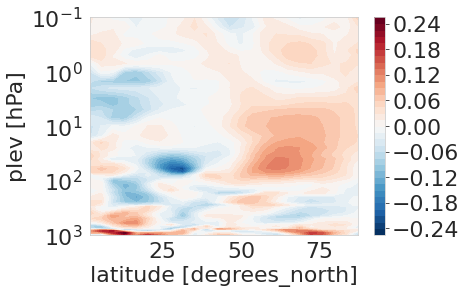

In [81]:
da_corr.plot.contourf(x = 'lat', levels = 41, yincrease = False)
plt.yscale('log')